# Noise distribution on images with and without noise


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from PIL import Image
from utils.images_generator import salt_and_pepper_noise, salt_and_pepper_noise_v2, normalize_img_to_0_255, generate_histogram, colored_noise, uniform_image
from utils.experiments_functions import get_img_info, get_img_info_simple
from itertools import combinations
from skimage import data
from skimage.color import rgb2gray
import utils.noise_generator as noise_gen
import utils.utils as utils_functions

## Extracting the metric from Sintorn dataset

Reading images filenames

In [3]:
import glob

# Path to the directory
images_path = f'data/Sintorn/hardware/'
images_class = 'canesugar01'

# Get all files with the prefix "canesugar01" in the directory
images_full_path = glob.glob(f"{images_path}*{images_class}*")

# Extract just the filenames without the path
images_filenames = [os.path.basename(path) for path in images_full_path]

print(f"Found {len(images_filenames)} files with prefix '{images_class}'")
print("First 5 filenames:", images_filenames[:5] if len(images_filenames) >= 5 else images_filenames)


Found 900 files with prefix 'canesugar01'
First 5 filenames: ['canesugar01-r000-s001.png', 'canesugar01-r000-s002.png', 'canesugar01-r000-s003.png', 'canesugar01-r000-s004.png', 'canesugar01-r000-s005.png']


uint8
MIN 0 MAX 255


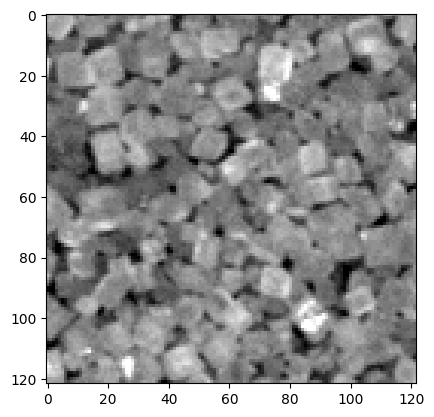

In [6]:
gs_image = cv2.imread(f'{images_path}/{images_filenames[0]}', cv2.IMREAD_GRAYSCALE)
plt.imshow(gs_image, cmap='gray')
print(gs_image.dtype)
print("MIN", gs_image.min(), "MAX", gs_image.max())

float64
MIN 0.0 MAX 1.0


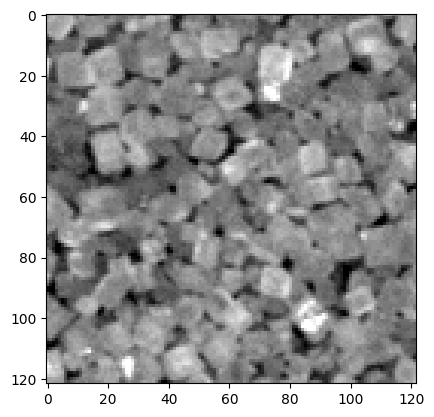

In [8]:
gs_image_float = utils_functions.normalize_uint8_to_float64(gs_image)
plt.imshow(gs_image_float, cmap='gray')
print(gs_image_float.dtype)
print("MIN", gs_image_float.min(), "MAX", gs_image_float.max())

Extracting metrics

In [15]:
# Process all images
noise_types = ['original', 'salt_and_pepper', 'speckle', 'gaussian', 'poisson']

# sets the probabilities used
noise_param_sp = [0.05, 0.1, 0.2, 0.3, 0.4] # salt and pepper
noise_param_gaussian = [0.2, 0.4, 0.6, 0.8] # gaussian
noise_param_speckle = [0.2, 0.6, 1.0, 1.4] # speckle
noise_param_poisson = [0.5, 3.0, 10.0, 30.0] # poisson

image_data_list = []
for idx, img_filename in enumerate(images_filenames):
    # reads the image
    gs_image = cv2.imread(f'{images_path}/{img_filename}', cv2.IMREAD_GRAYSCALE)
    image_title = img_filename.split('.')[0]
    print(image_title, f"{idx+1}/{len(images_filenames)}")
    # normalize the image	
    gs_image = utils_functions.normalize_uint8_to_float64(gs_image)
    # extract metrics
    print("\tExtracting data")
    image_data = get_img_info_simple(gs_image)
    # add the information
    image_data['image_name'] = img_filename
    image_data['noise_type'] = 'original'
    image_data['noise_param'] = 0
    image_data_list.append(image_data)

    # adds s&p noise
    print("\tAdding S&P noise")
    for prob in noise_param_sp:
        print(f"\t\tProbability = {prob}")
        # generate noise image
        print("\t\tGenerating noised image")
        noised_image = noise_gen.add_sp_noise(gs_image, prob, prob)
        # extract metrics
        print("\t\tExtracting data")
        noised_image_data = get_img_info_simple(noised_image)
        # add the information
        noised_image_data['image_name'] = img_filename
        noised_image_data['noise_type'] = 'salt_and_pepper'
        noised_image_data['noise_param'] = prob
        image_data_list.append(noised_image_data)
    # adds gaussian noise
    print("\tAdding Gaussian noise")
    for param in noise_param_gaussian:
        print(f"\t\tSigma = {param}")
        # generate noise image
        print("\t\tGenerating noised image")
        noised_image = noise_gen.add_gaussian_noise(image=gs_image, mean=0, sigma=param)
        # extract metrics
        print("\t\tExtracting data")
        noised_image_data = get_img_info_simple(noised_image)
        # add the information
        noised_image_data['image_name'] = img_filename
        noised_image_data['noise_type'] = 'gaussian'
        noised_image_data['noise_param'] = param
        image_data_list.append(noised_image_data)
    # adds speckle noise
    print("\tAdding Speckle noise")
    for param in noise_param_speckle:
        print(f"\t\tSigma = {param}")
        # generate noise image
        print("\t\tGenerating noised image")
        noised_image = noise_gen.add_speckle_noise(gs_image, mean=0, sigma=param)
        # extract metrics
        print("\t\tExtracting data")
        noised_image_data = get_img_info_simple(noised_image)
        # add the information
        noised_image_data['image_name'] = img_filename
        noised_image_data['noise_type'] = 'speckle'
        noised_image_data['noise_param'] = param
        image_data_list.append(noised_image_data)
    # adds poisson noise
    print("\tAdding Poisson noise")
    for factor in noise_param_poisson:
        print(f"\t\tFactor = {factor}")
        # generate noise image
        print("\t\tGenerating noised image")
        noised_image = noise_gen.add_poisson_noise_normalized(gs_image, factor)
        # extract metrics
        print("\t\tExtracting data")
        noised_image_data = get_img_info_simple(noised_image)
        # add the information
        noised_image_data['image_name'] = img_filename
        noised_image_data['noise_type'] = 'poisson'
        noised_image_data['noise_param'] = factor
        image_data_list.append(noised_image_data)

canesugar01-r000-s001 1/900
	Extracting data
	Adding S&P noise
		Probability = 0.05
		Generating noised image
		Extracting data
		Probability = 0.1
		Generating noised image
		Extracting data
		Probability = 0.2
		Generating noised image
		Extracting data
		Probability = 0.3
		Generating noised image
		Extracting data
		Probability = 0.4
		Generating noised image
		Extracting data
	Adding Gaussian noise
		Sigma = 0.2
		Generating noised image
		Extracting data
		Sigma = 0.4
		Generating noised image
		Extracting data
		Sigma = 0.6
		Generating noised image
		Extracting data
		Sigma = 0.8
		Generating noised image
		Extracting data
	Adding Speckle noise
		Sigma = 0.2
		Generating noised image
		Extracting data
		Sigma = 0.6
		Generating noised image
		Extracting data
		Sigma = 1.0
		Generating noised image
		Extracting data
		Sigma = 1.4
		Generating noised image
		Extracting data
	Adding Poisson noise
		Factor = 0.5
		Generating noised image
		Extracting data
		Factor = 3.0
		Generatin

In [16]:
data_default_aux = pd.concat(image_data_list, ignore_index=True)
data_default_aux.to_csv(f"results/qualificacao_noises/sintorn_distribution/metrics_{images_class}.csv", index=False)

## Generating boxplots

In [29]:
images_class = 'canesugar01'
data_default_aux = pd.read_csv(f"results/qualificacao_noises/sintorn_distribution/metrics_{images_class}.csv")

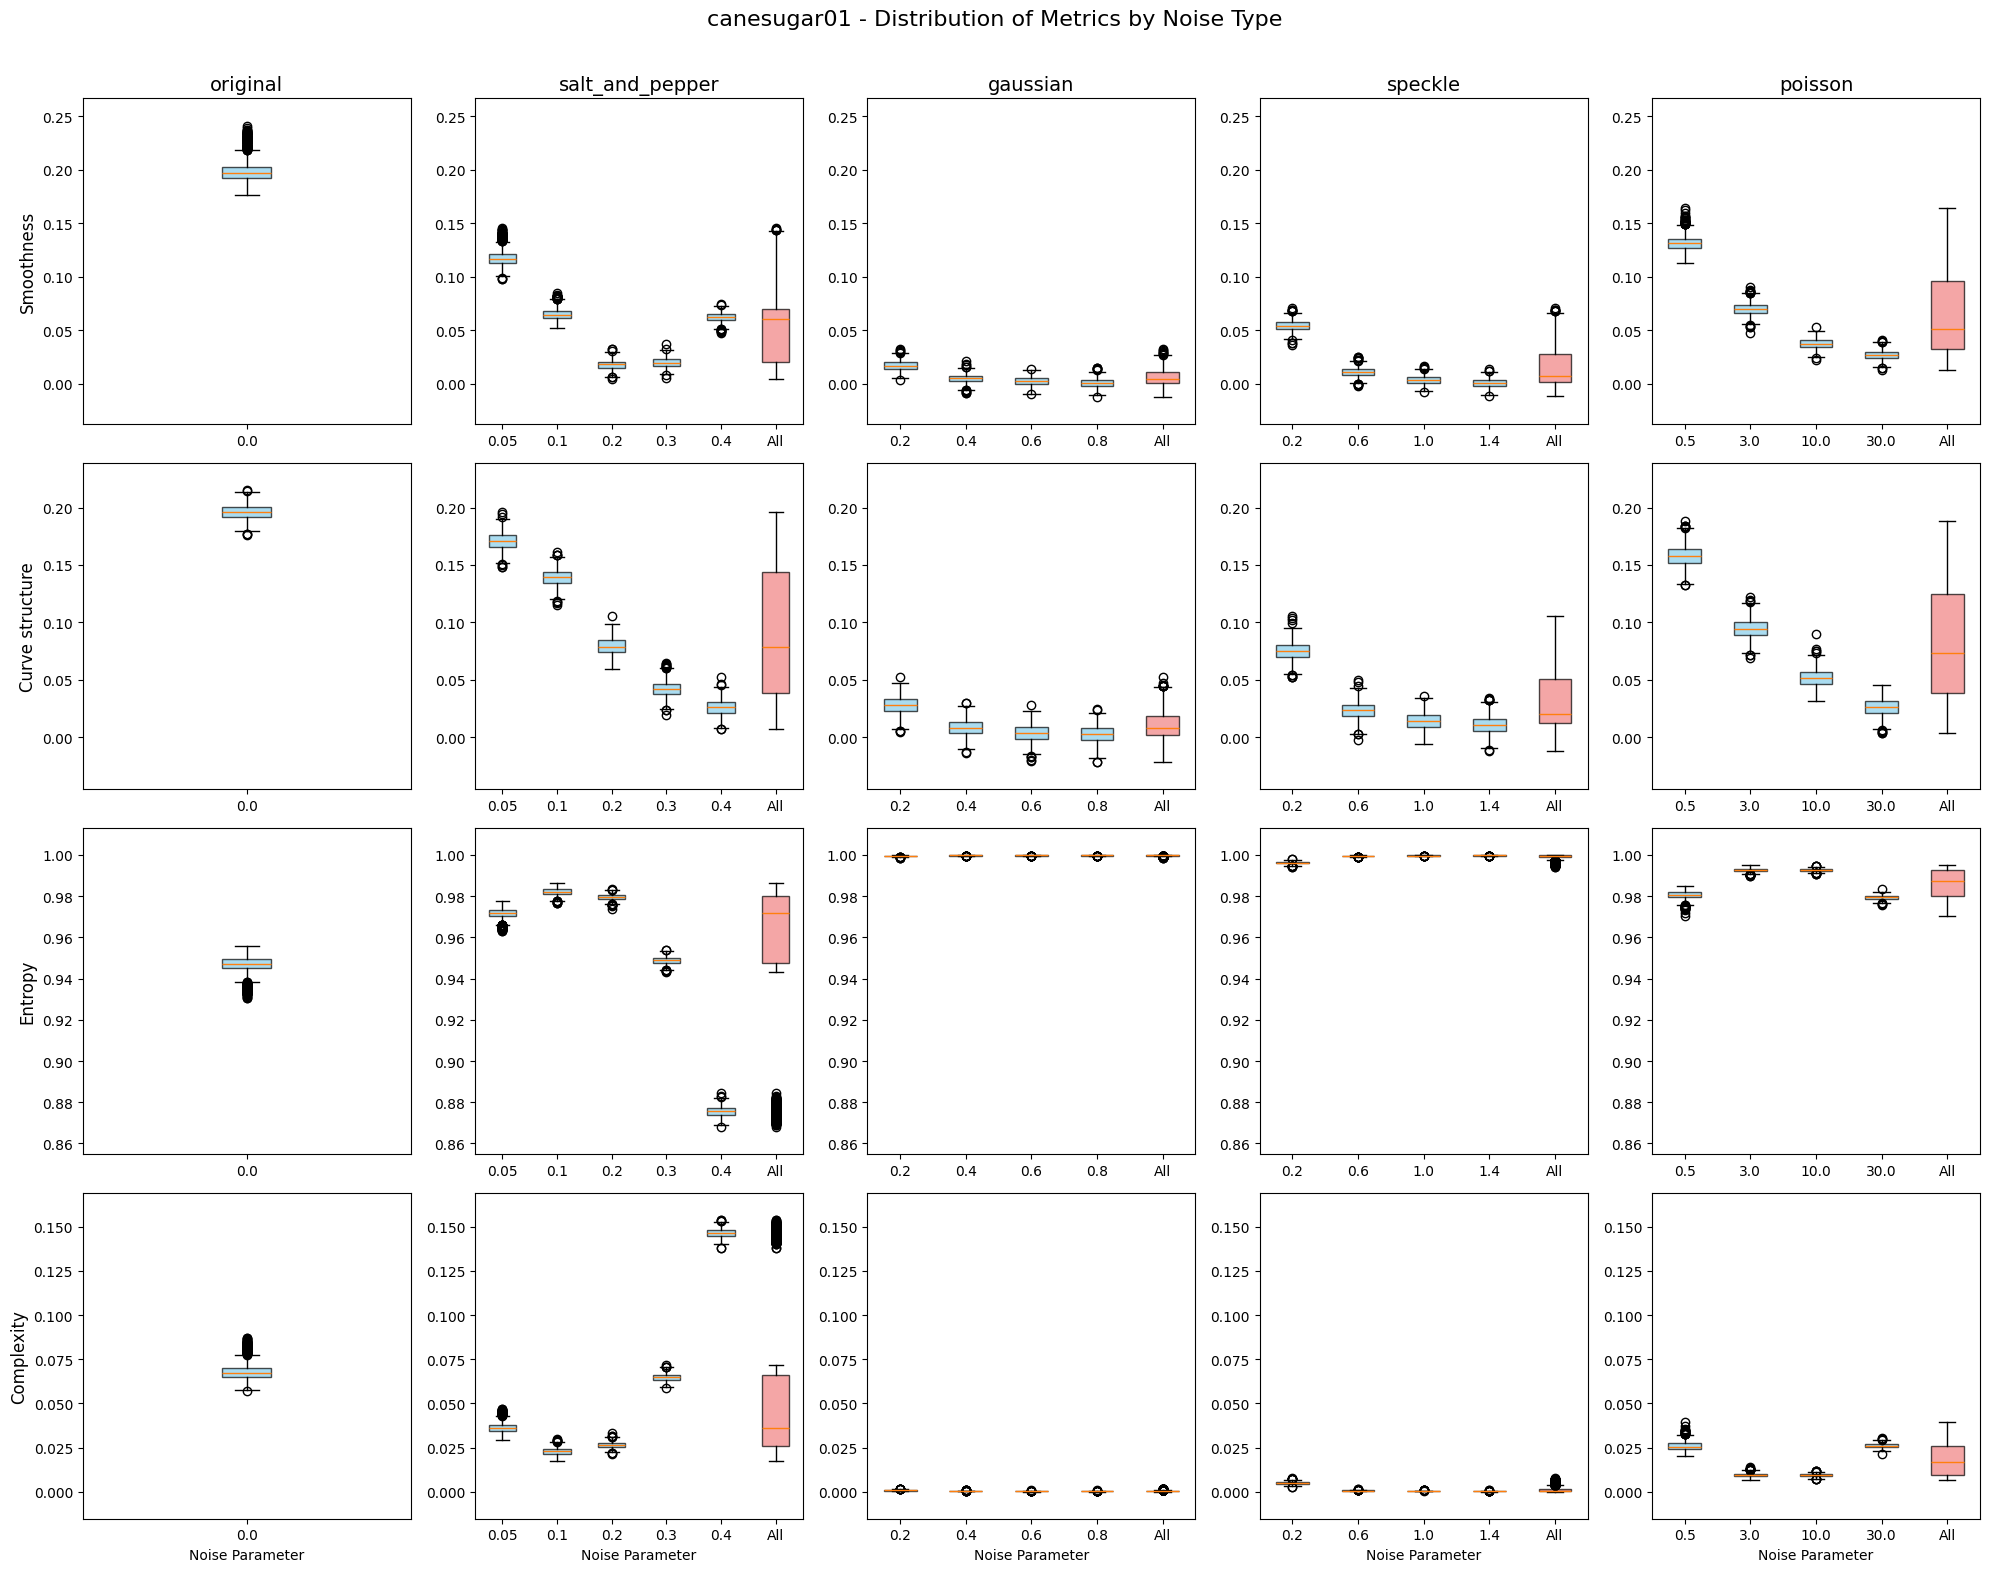

In [31]:
# Create a figure with 4x5 subplots (4 metrics x 5 noise types)
fig, axs = plt.subplots(4, 5, figsize=(20, 16))
fig.suptitle(f'{images_class} - Distribution of Metrics by Noise Type', fontsize=16)

# Define metrics and noise types
metrics = ['Smoothness', 'Curve structure', 'Entropy', 'Complexity']
noise_types_list = data_default_aux['noise_type'].unique()

# Set column titles (noise types)
for j, noise_type in enumerate(noise_types_list):
    axs[0, j].set_title(noise_type, fontsize=14)

# Determine y-axis limits for each metric
y_limits = {}
for metric in metrics:
    min_val = data_default_aux[metric].min()
    max_val = data_default_aux[metric].max()
    # Add some padding (10% of the range)
    padding = (max_val - min_val) * 0.1
    y_limits[metric] = [min_val - padding, max_val + padding]

# Create boxplots for each metric and noise type
for i, metric in enumerate(metrics):
    # Set row labels (metrics)
    axs[i, 0].set_ylabel(metric, fontsize=12)
    
    # For each noise type, create a boxplot for the current metric
    for j, noise_type in enumerate(noise_types_list):
        # Filter data for the current noise type
        noise_data = data_default_aux[data_default_aux['noise_type'] == noise_type]
        
        # Group by noise parameter for the current metric
        grouped_data = [group[metric].values for param, group in noise_data.groupby('noise_param')]
        group_labels = [str(param) for param in sorted(noise_data['noise_param'].unique())]
        
        # Add "All" category for non-original noise types
        if noise_type != 'original':
            grouped_data.append(noise_data[metric].values)
            group_labels.append('All')
        
        # Create boxplot
        bp = axs[i, j].boxplot(grouped_data, labels=group_labels, patch_artist=True)
        
        # Customize boxplot colors
        for k, box in enumerate(bp['boxes']):
            # Use a different color for the "All" box
            if k == len(grouped_data) - 1 and noise_type != 'original':
                box.set(facecolor='lightcoral', alpha=0.7)
            else:
                box.set(facecolor='skyblue', alpha=0.7)
        
        # Set x-label on the bottom row
        if i == 3:
            axs[i, j].set_xlabel('Noise Parameter', fontsize=10)
        
        # Set consistent y-axis limits for the same metric
        axs[i, j].set_ylim(y_limits[metric])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig(f"results/qualificacao_noises/sintorn_distribution/metrics_{images_class}_boxplots.png", dpi=300, bbox_inches='tight')
plt.show()
